# Exploratory Analysis and Visualisation on Steam
***
## Essential Libraries
Let us begin by importing essential libraries
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

## 1. Importing Steam Dataset

In [2]:
# import the datasets
steam = pd.read_csv('Cleaned/steam_cleaned.csv')
print('Number of Rows: {}'.format(steam.shape[0]))
print('Number of Columns: {}'.format(steam.shape[1]))
steam.head()

Number of Rows: 62056
Number of Columns: 16


,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,1/11/2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,229766,5992,9847,169,10000000-20000000,10.00
1,20,Team Fortress Classic,1/4/1999,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,7005,1069,167,25,5000000-10000000,5.25
2,30,Day of Defeat,1/5/2003,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled;Family S...,Action,FPS;World War II;Multiplayer,6036,664,553,17,5000000-10000000,5.25
3,40,Deathmatch Classic,1/6/2001,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,2415,511,70,13,5000000-10000000,5.25
4,50,Half-Life: Opposing Force,1/11/1999,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,20697,1054,406,157,2000000-5000000,5.25


In [3]:
# check for missing values
steam.isna().sum()

appid                0
name                 0
release_date         0
english              0
developer            0
publisher           26
platforms            0
categories           0
genres               0
steamspy_tags        0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [4]:
steam.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
categories           object
genres               object
steamspy_tags        object
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Description of the Steam Dataset
​
> **appid** : Unique ID for each Game  
> **name** : Name of each Game  
> **release_date** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

## 6. `release_date`
managed to change the '/' to '-' but unable to do the EDA for this idk why ;-;

In [8]:
steam['release_date'] = steam['release_date'].str.replace('/','-') #string replaced

In [9]:
steam.head(n=10)

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,1-11-2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,229766,5992,9847,169,10000000-20000000,10.00
1,20,Team Fortress Classic,1-4-1999,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,7005,1069,167,25,5000000-10000000,5.25
2,30,Day of Defeat,1-5-2003,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled;Family S...,Action,FPS;World War II;Multiplayer,6036,664,553,17,5000000-10000000,5.25
3,40,Deathmatch Classic,1-6-2001,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,2415,511,70,13,5000000-10000000,5.25
4,50,Half-Life: Opposing Force,1-11-1999,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,20697,1054,406,157,2000000-5000000,5.25
5,60,Ricochet,1-11-2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Valve Anti-Cheat e...,Action,Action;FPS;Multiplayer,4604,995,23,4,5000000-10000000,5.25
6,80,Counter-Strike: Condition Zero,1-3-2004,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Shooter,22540,2144,3028,27,5000000-10000000,10.00
7,130,Half-Life: Blue Shift,1-6-2001,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Remote Play Together;Family Sharing,Action,FPS;Action;Sci-fi,14671,1266,273,103,5000000-10000000,5.25
8,220,Half-Life 2,16-11-2004,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Full controll...,Action,FPS;Action;Sci-fi,185234,4521,804,454,5000000-10000000,10.00
9,240,Counter-Strike: Source,1-11-2004,1,Valve,Valve,windows;mac;linux,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,Shooter;FPS;Action,162702,6259,8206,451,10000000-20000000,10.00


In [11]:
#steam['release_date'] = steam['release_date'].astype('datetime64[ns]')
steam['release_date'] = pd.to_datetime(steam['release_date'], format='%d-%m-%y')

ValueError: unconverted data remains when parsing with format "%d-%m-%y": "00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## 7. Categorical Columns
Analysing columns which have categorical data: [`english`, `developer`, `publisher`]

In [5]:
# categorical columns
steam_cat = ['english', 'developer', 'publisher']

## 7.1 English Column

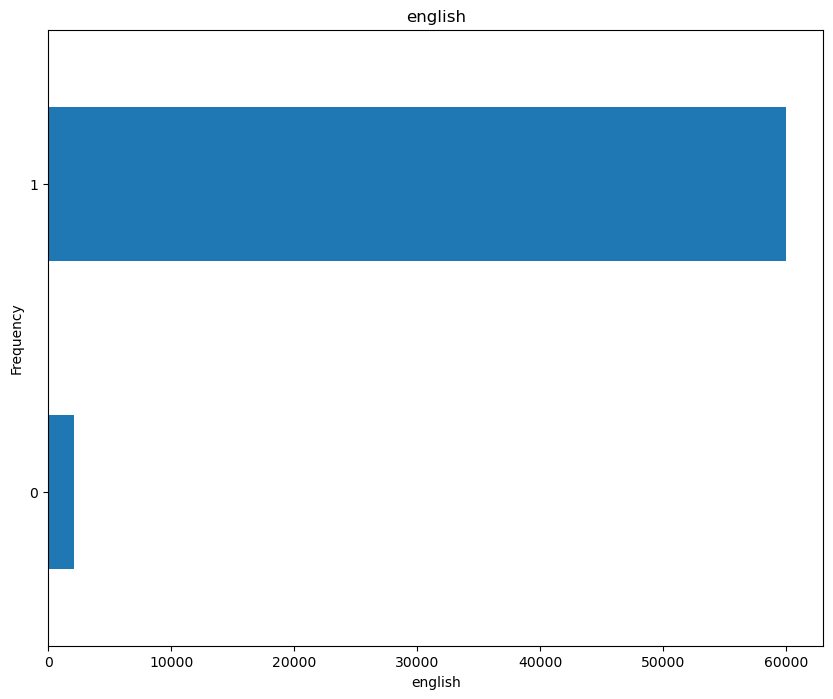

Total number of categories in english: 2
english
1    59987
0     2069
Name: count, dtype: int64




In [6]:
column = 'english'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(2).plot(kind = 'barh')
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(2))
#print(df)
print('\n')

## 7.1 Observation
- **English Plot:** We can see from the 1st plot an overwhelming number of games support english **(96%)**, ratio of 59.9k : 2.1k. The game might need to be able to played in English for it to be successful. However, this might not be case as our English column only takes into account games that support English or Not. Games that support English might also support other languages. 

**(Maybe can plot English with Popularity (nid define) of game)**

## 7.2 Developers Column

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29611 (\N{CJK UNIFIED IDEOGRAPH-73AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29808 (\N{CJK UNIFIED IDEOGRAPH-7470}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  fig.canvas.print_figure(bytes_

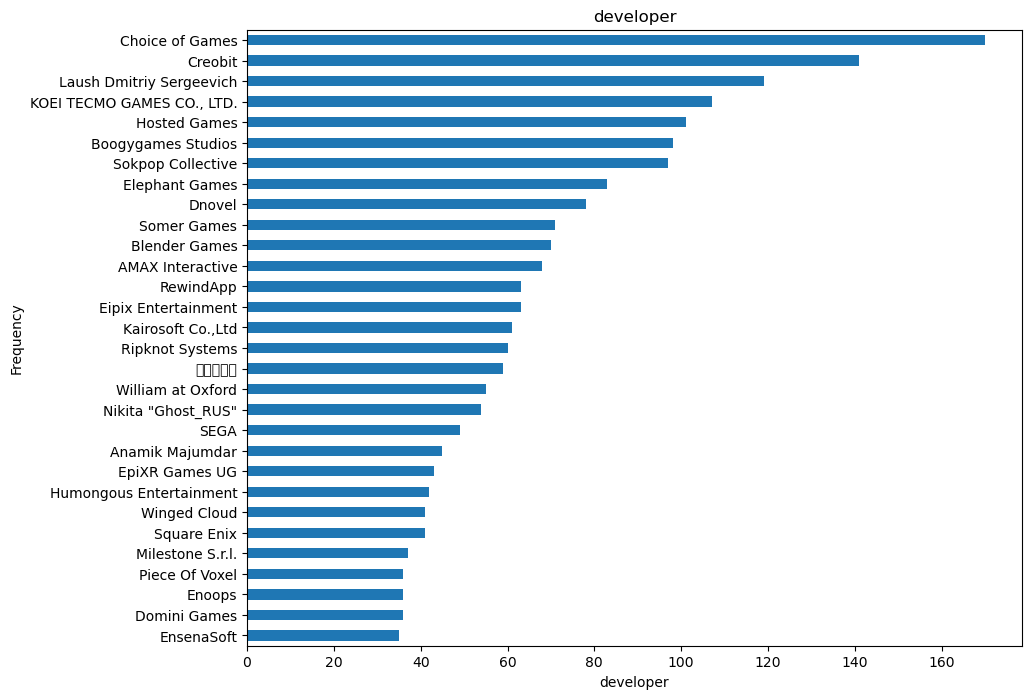

Total number of categories in developer: 35718
developer
Choice of Games               170
Creobit                       141
Laush Dmitriy Sergeevich      119
KOEI TECMO GAMES CO., LTD.    107
Hosted Games                  101
Boogygames Studios             98
Sokpop Collective              97
Elephant Games                 83
Dnovel                         78
Somer Games                    71
Blender Games                  70
AMAX Interactive               68
RewindApp                      63
Eipix Entertainment            63
Kairosoft Co.,Ltd              61
Ripknot Systems                60
玫瑰工作室                          59
William at Oxford              55
Nikita "Ghost_RUS"             54
SEGA                           49
Anamik Majumdar                45
EpiXR Games UG                 43
Humongous Entertainment        42
Winged Cloud                   41
Square Enix                    41
Milestone S.r.l.               37
Piece Of Voxel                 36
Enoops                   

In [7]:
# only top 30 frequent categories for developer are plotted
column = 'developer'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(30).plot(kind = 'barh')
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(30))
#print(df)
print('\n')

## 7.2 Observation
- In the horizontal bar chart above, even though theres only the 30 top developers shown, we can see a difference in distribution. About 20 out of 35,718 developers have developed more than 50 games while the rest is less of that. This is an important observtion as this could prove to be a double edged sword. 
- Although Choice of Games has 170 games developed and released on steam, the popularity of these games might not be high. This might be due to factors such as not having the manpower to maintain these games with newer games being developed.
- On the flip side, the high number of games developed might be an indicator that a developer is able to develop good quality games. The repuation of the developer might push or pull gamers away from playing their games. <br>

**(this could be another thing to explore, developers and the games they produce)**

## 7.3 Publishers Column

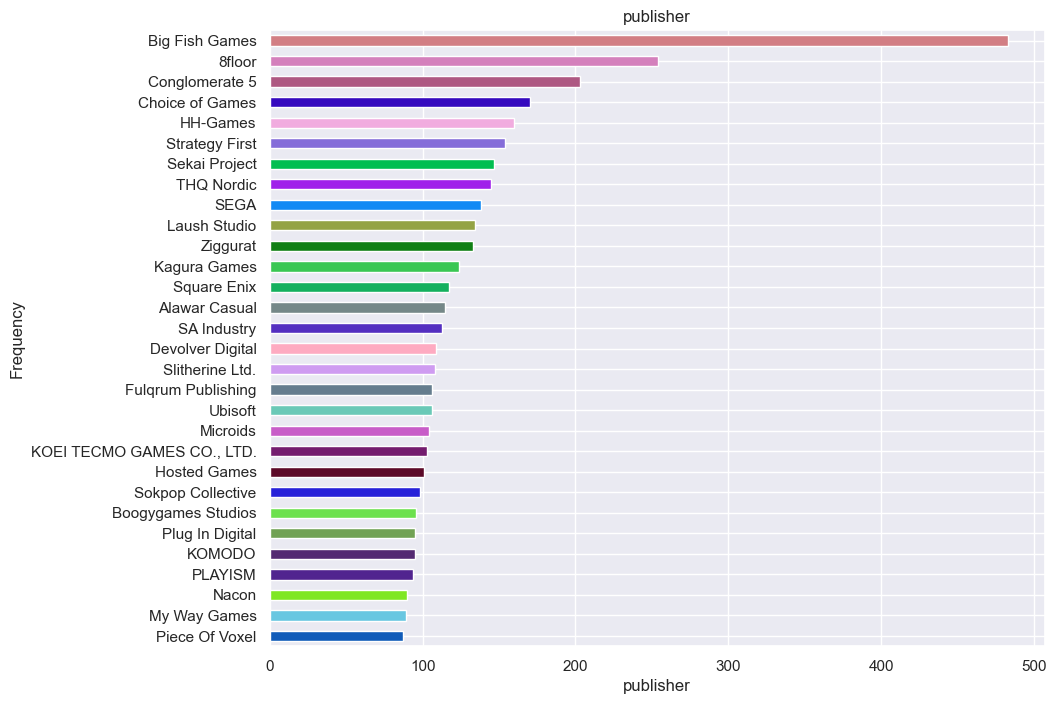

Total number of categories in publisher: 30957
publisher
Big Fish Games                483
8floor                        254
Conglomerate 5                203
Choice of Games               170
HH-Games                      160
Strategy First                154
Sekai Project                 147
THQ Nordic                    145
SEGA                          138
Laush Studio                  134
Ziggurat                      133
Kagura Games                  124
Square Enix                   117
Alawar Casual                 115
SA Industry                   113
Devolver Digital              109
Slitherine Ltd.               108
Fulqrum Publishing            106
Ubisoft                       106
Microids                      104
KOEI TECMO GAMES CO., LTD.    103
Hosted Games                  101
Sokpop Collective              98
Boogygames Studios             96
Plug In Digital                95
KOMODO                         95
PLAYISM                        94
Nacon                    

In [16]:
import random

# Generate random colors
colors = [plt.cm.colors.to_rgba((random.random(), random.random(), random.random())) for _ in range(30)]

# only top 30 frequent categories for publiser are plotted
column = 'publisher'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(30).plot(kind = 'barh', color = colors)
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(30))
#print(df)
print('\n')

## 7.3 Observation
- In the horizontal bar chart above, similarly, only the top 30 publishers are shown. There is a clear distribution being shown here as almost all of the top 30 has more than 100 games published. The top publisher Big Fish Games has published almost 500 games, almost twice as much as the 2nd placed publisher 8 floor. This is a huge difference especially if compared to the rest of the publishers.
- Publishers might not face the same manpower constraints as the developers as publishers do not need to develop the game. However the combination of certain developers and publishers might be an interesting point to look at. Gamers might be more willing to play games published by certain publishers or even a combination of both

**(maybe can look into the combination of (developer,publisher) with relation to popularity of games**

## 8. Numeric Columns

In [35]:
# numeric columns
steam_num = ['positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']

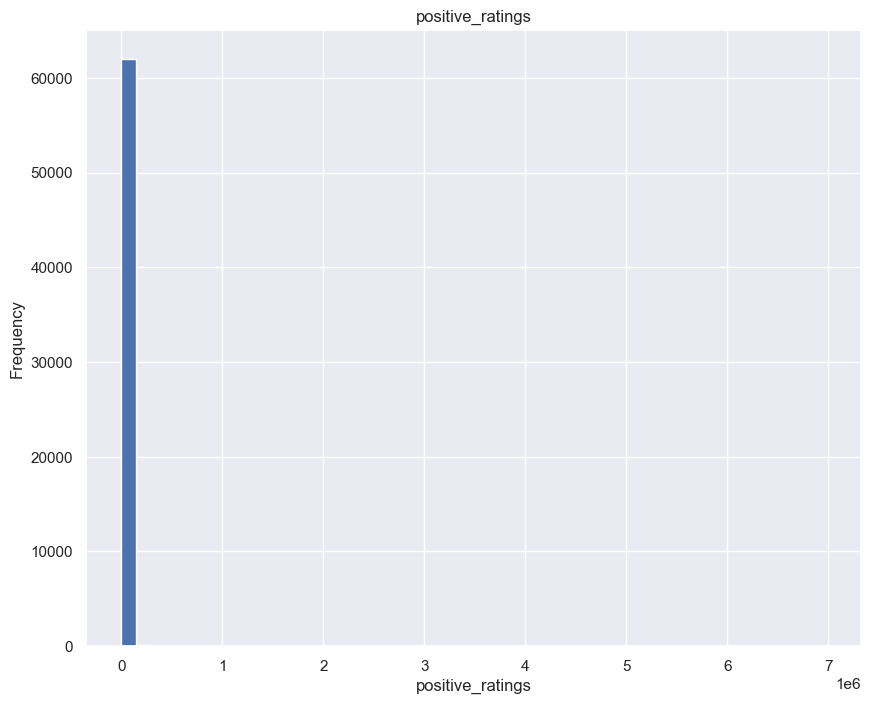

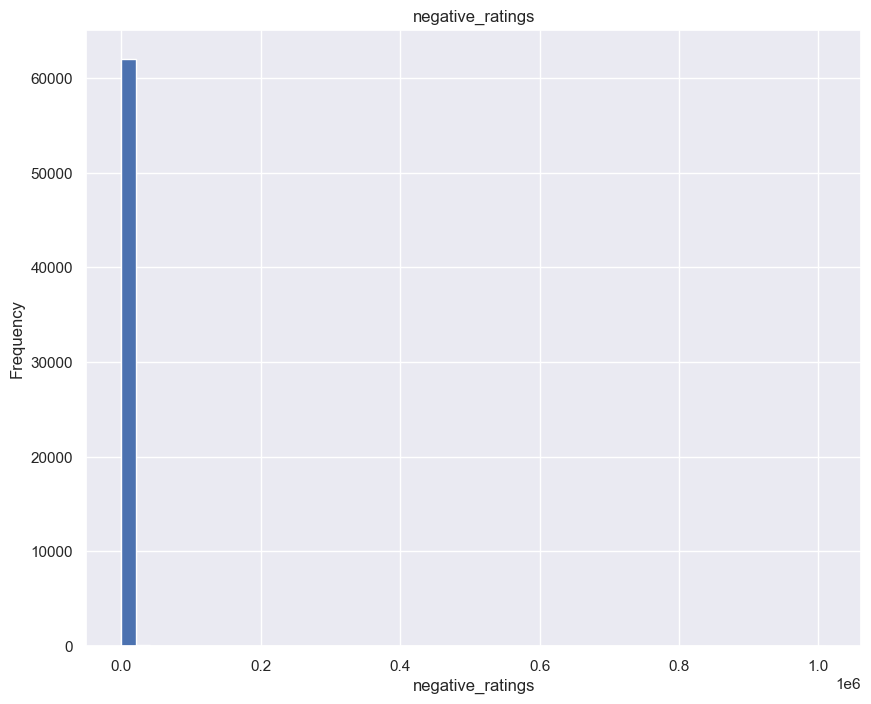

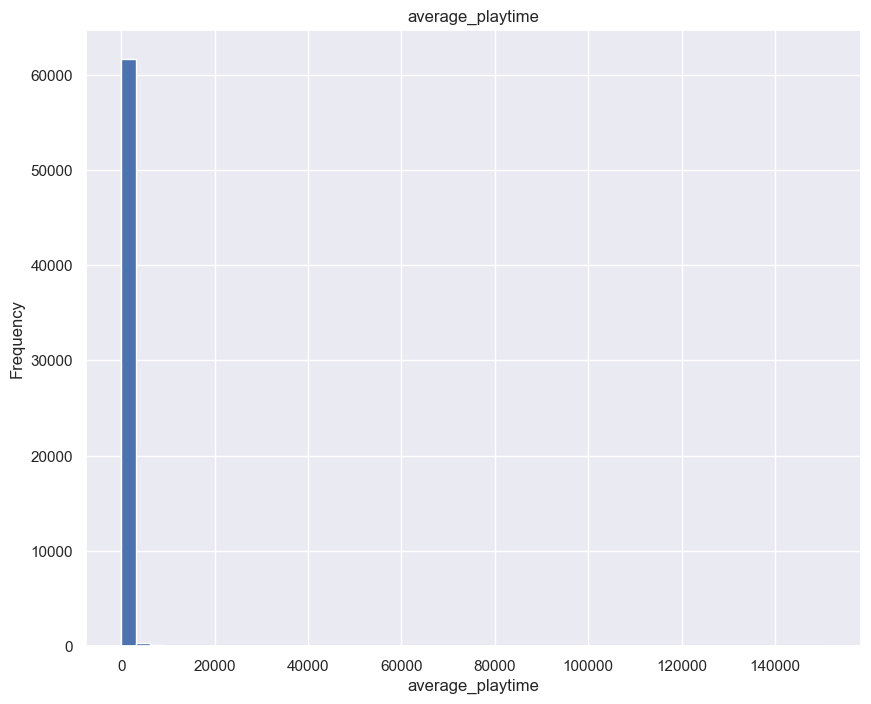

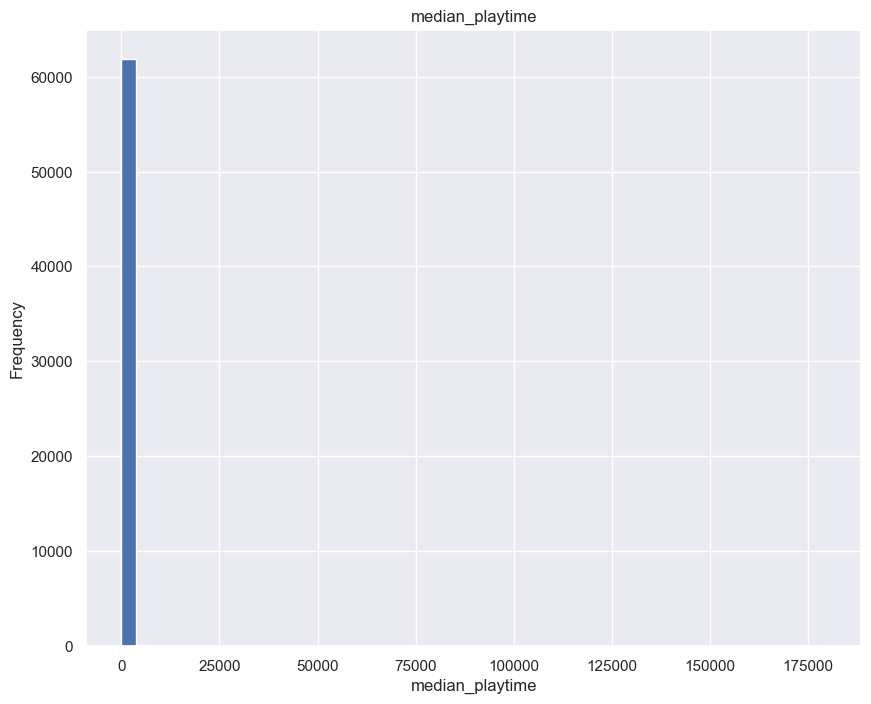

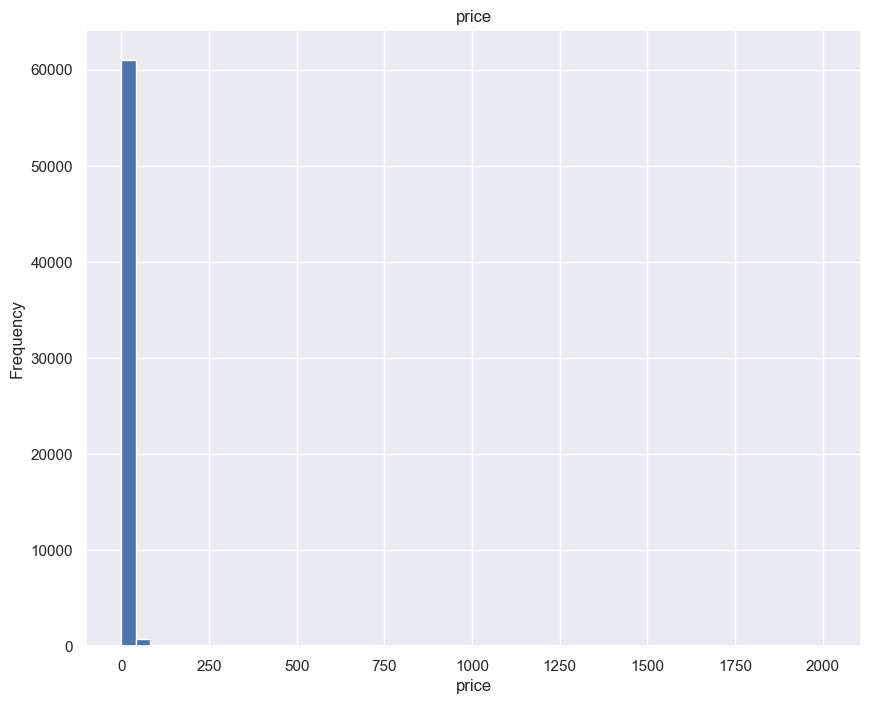

In [36]:
# visualize all numeric columns
for col in steam_num:
  plt.figure(figsize = (10, 8))
  steam[col].plot(kind = 'hist', bins = 50)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()
  print('\n')

Um. The data is extremely skewed. Let's exclude the outliers and zoom in..
## dk which data are being removed might be a good idea to print them out before removing

In [37]:
# write a function to remove outliers
# In the definition of box plots, values < Q1 - 1.5 IQR and values > Q3 + 1.5 IQR are the outliers
def remove_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  data_outlier_excluded = data[(data >= Q1 - (1.5 * IQR)) & (data <= Q3 + (1.5 * IQR))]
  return data_outlier_excluded

## 8.1 `positive_ratings`
Let's look at the top 10 games with the most positive ratings 

In [38]:
# top 10 game by positive ratings
steam.sort_values(by = 'positive_ratings', ascending = False).head(10)[['name', 'positive_ratings']]

,name,positive_ratings
22,Counter-Strike 2,6976943
19,Dota 2,1812144
12578,PUBG: BATTLEGROUNDS,1361485
1116,Terraria,1241092
5115,Tom Clancy's Rainbow Six® Siege,1081208
124,Garry's Mod,1024266
1975,Rust,911251
18,Left 4 Dead 2,825777
7519,Wallpaper Engine,751158
36334,ELDEN RING,742616


Now the distribution:

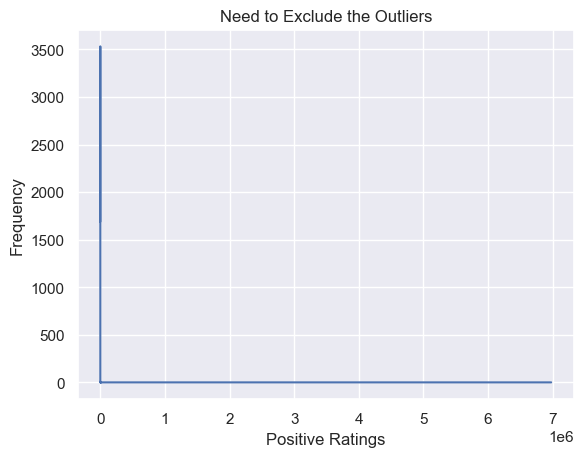

In [39]:
# plot the distribution of positive ratings
plt.figure()
steam['positive_ratings'].value_counts().sort_index().plot()
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Need to Exclude the Outliers')
plt.show()

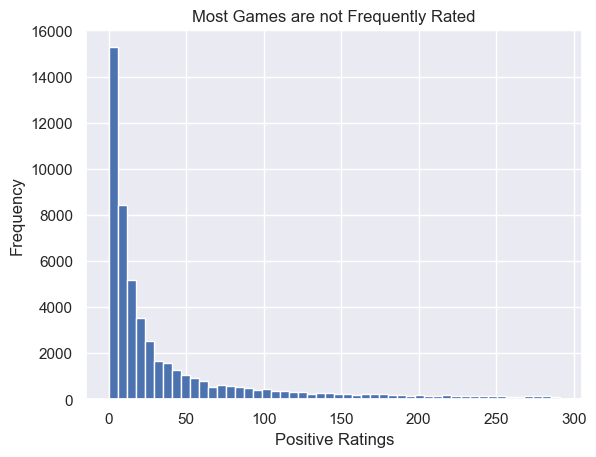

total games: 62056
games with positive ratings outliers excluded: 51703


In [40]:
# exclude outliers from positive_ratings
pos_r = steam['positive_ratings']
pos_r_ex = remove_outliers(pos_r)

# plot the distribution of positive ratings
plt.figure()
pos_r_ex.plot(kind = 'hist', bins = 50)
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Most Games are not Frequently Rated')
plt.show()

# conclusion
print('total games:', len(pos_r))
print('games with positive ratings outliers excluded:', len(pos_r_ex))

Most Games are not frequently rated though. 
**E

In [44]:
pos_r_ex.head()

23     85
27    281
32    275
33    215
37    176
Name: positive_ratings, dtype: int64

## 8.2 `negative_ratings`
Top 10 with the most negative ratings

In [41]:
steam.sort_values(by = 'negative_ratings', ascending = False).head(10)[['name', 'negative_ratings']]

,name,negative_ratings
22,Counter-Strike 2,1010971
12578,PUBG: BATTLEGROUNDS,975066
19,Dota 2,399400
1689,War Thunder,231267
5115,Tom Clancy's Rainbow Six® Siege,185669
33907,Apex Legends™,177124
5919,Dead by Daylight,140702
1975,Rust,135032
31081,Cyberpunk 2077,133122
30906,Destiny 2,115431


A lot of overlap. Mostly because of popularity. <br>

We should look at the ratio instead. The table below is sorted with ratio of pos:neg. The highest ratio being at the top.

In [11]:
# ratio of positive/negative ratings
pos_neg_ratio = steam['positive_ratings'] / (steam['negative_ratings'] + 1) # +1 to avoid zero divisions
top_ratios_id = pos_neg_ratio.sort_values(ascending = False).head(10).index

steam.loc[top_ratios_id]

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27508,992740,祈風 Inorikaze,13/2/2019,0,Twilight -日月之境-;觀象草圖 Astrolabe Draft,觀象草圖 Astrolabe Draft,windows,Single-player;Steam Achievements;Steam Cloud;F...,Adventure;Casual;Indie,Adventure;Indie;Casual,368,0,53,53,0-20000,11.00
54847,1895350,I Wani Hug that Gator!,14/2/2024,1,Cavemanon,Cavemanon,windows;mac;linux,Single-player;Partial Controller Support;Famil...,Casual;Indie,Visual Novel;Story Rich;Choose Your Own Adventure,1662,8,1466,2248,50000-100000,14.50
30392,1070550,Don't Escape Trilogy,29/7/2019,1,scriptwelder,Armor Games Studios,windows,Single-player;Steam Achievements;Family Sharing,Adventure;Indie,Adventure;Indie;Horror,366,1,0,0,0-20000,5.25
42103,1423370,NOeSIS02_羽化,1/11/2021,0,Classic Chocolat,Red × Balloon;Hikare 个人汉化,windows,Single-player,Adventure;Casual;Free to Play;Indie;RPG;Simula...,RPG;2D;Anime,538,2,0,0,20000-50000,0.00
49703,1684410,Seal World,26/12/2023,1,SealDev,SealDev,windows;mac;linux,Single-player;Steam Achievements;Full controll...,Casual,Comedy;Cute;Funny,519,2,81,81,0-20000,5.25
20310,790060,The Void Rains Upon Her Heart,14/2/2018,1,Veyeral Games,The Hidden Levels,windows,Single-player;Steam Achievements;Full controll...,Action;Indie;Early Access,Action Roguelike;Indie;Bullet Hell,1182,6,974,974,20000-50000,13.00
28830,1029650,יום פתוח (Open Day),22/6/2022,0,Rafael Ben-Ari,Rafael Ben-Ari,windows,Single-player;Steam Achievements;Full controll...,Adventure;Indie;RPG,Singleplayer;Top-Down;Turn-Based Combat,158,0,0,0,20000-50000,14.50
38027,1295320,Can of Wormholes,24/3/2023,1,munted finger,munted finger,windows;mac,Single-player;Steam Achievements;Full controll...,Indie,Indie;Puzzle;Sokoban,314,1,1162,1162,0-20000,18.50
22790,858940,Flowers -Le volume sur ete-,26/7/2018,1,Innocent Grey,JAST USA,windows,Single-player;Steam Trading Cards;Steam Cloud;...,Casual,Visual Novel;LGBTQ+;Female Protagonist,1095,6,854,854,20000-50000,18.50
29083,1035990,Dialtown: Phone Dating Sim,14/2/2022,1,DirectDoggo,DirectDoggo,windows,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Indie;Casual;Comedy,1492,9,0,0,50000-100000,8.50


## 8.3 Analysis `negative` & `positive` ratings
In conclusion, rank the games with number of positive ratings but still show the negative ratings.
- Some of the games in the top 10 have high ratios but are not very popular. 
- These games have 0 average and median playtime, some have less than 20,000 owners <br>

Although the ratios might not be a good indicator of a popular game, the positive and negative ratings are still important indicators. The ratings provide developers with feedback from gamers, helping the developers improve their game in the long run.

In [30]:
ratings = pd.DataFrame(steam[['positive_ratings', 'negative_ratings']])
ratings.head()

,positive_ratings,negative_ratings
0,229766,5992
1,7005,1069
2,6036,664
3,2415,511
4,20697,1054


                  positive_ratings  negative_ratings
positive_ratings           1.00000           0.81287
negative_ratings           0.81287           1.00000


<Axes: >

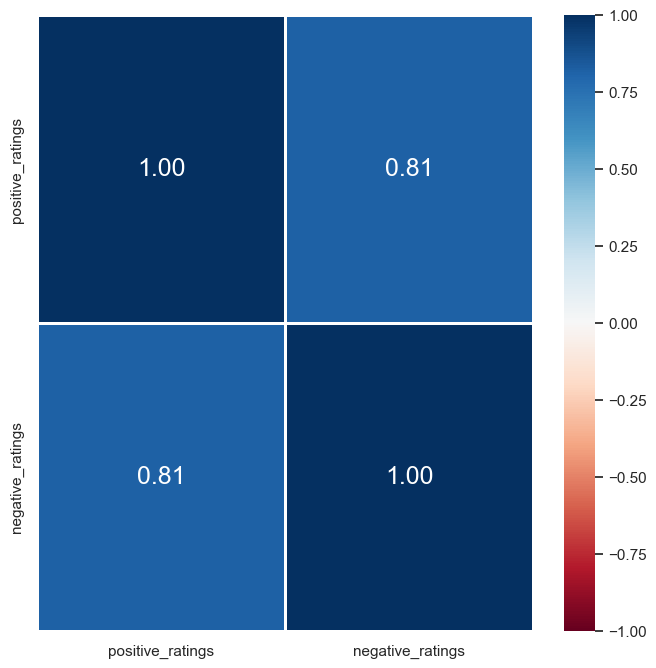

In [31]:
# Correlation Matrix
print(ratings.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(ratings.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

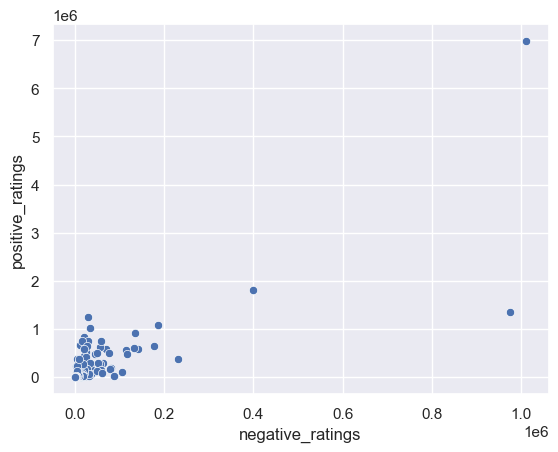

In [49]:
# Draw pairs of variables against one another
#sns.scatterplot(ratings)
ax = sns.scatterplot(x="negative_ratings", y="positive_ratings", data=ratings)

## 8.3 Observation
From the HeatMap and ScatterPlot, we can see that the positive and negative ratings have a high correlation of 0.81 with each other. This might be due to the differing opinions of players who own the game. Thus the both `ratings` column might not be good columns to use when evaluating whether a game is popular or not.

## 8.4 `average_playtime`
in minutes

In [109]:
# check 0 values in average_playtime
print('total games:', steam.shape[0])
print('games with average playtime != 0:', steam[steam['average_playtime'] != 0].shape[0])

total games: 62056
games with average playtime != 0: 15212


In [113]:
# Percentage = ((playtime !=0) / total games) * 100
print('Percentage of total Games played:', (steam[steam['average_playtime'] != 0].shape[0]/steam.shape[0])*100)

Percentage of total Games played: 24.513342787159985


### Observation
As we can see from the percentage, out of the **62,056** games on steam, only **24%** of them are being played by the users of steam. This is a very low percentage as this indicates some games haven't been played since its release <br> 
(maybe can display these games)

In [115]:
# top 10 games with longest average playtime
steam.sort_values(by = 'average_playtime', ascending = False).head(n=10)

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
3620,315810,eden*,30-1-2015,1,minori,MangaGamer,windows,Single-player;Steam Trading Cards;Steam Cloud;...,Adventure,Visual Novel;Anime;Story Rich,3710,115,150964,168,100000-200000,20.0
2359,269470,MorphVOX Pro 4 - Voice Changer (Old),13-2-2014,1,Screaming Bee,Screaming Bee,windows,Single-player;Steam Cloud,Audio Production;Utilities,Audio Production;Utilities;Software,341,257,142090,142090,0-20000,39.0
27098,979920,Supremacy 1914: World War 1,16-7-2019,1,Bytro Labs GmbH,Bytro Labs GmbH,windows;mac,Multi-player;MMO;PvP;Online PvP;Co-op;Online C...,Free to Play;Massively Multiplayer;Simulation;...,Strategy;Free to Play;War,2413,795,90871,179708,200000-500000,0.0
15402,663690,Rival Rampage,7-11-2017,1,Oddscure;RadioDog,Oddscure,windows,Multi-player;Co-op;Online Co-op,Action;Indie,Action;Indie;Multiplayer,47,13,78283,78283,20000-50000,0.0
43534,1469160,Wartune Reborn,26-2-2021,1,7Road,7Road,windows,Single-player;Multi-player;MMO;PvP;Online PvP;...,Adventure;Casual;Free to Play;Massively Multip...,Turn-Based Combat;Massively Multiplayer;Multip...,152,76,71854,71854,50000-100000,0.0
43535,1469160,Wartune Reborn,26-2-2021,1,7Road,7Road,windows,Single-player;Multi-player;MMO;PvP;Online PvP;...,Adventure;Casual;Free to Play;Massively Multip...,Turn-Based Combat;Massively Multiplayer;Multip...,152,76,71854,71854,50000-100000,0.0
20333,790710,World of Warplanes,10-2-2022,1,Wargaming Group Limited,Wargaming Group Limited,windows,Multi-player;MMO;PvP;Online PvP;Co-op;Online C...,Action;Massively Multiplayer;Simulation;Free t...,Free to Play;Third-Person Shooter;Massively Mu...,3232,1203,44521,196,500000-1000000,0.0
19,570,Dota 2,9-7-2013,1,Valve,Valve,windows;mac;linux,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Strategy;Free to Play,Free to Play;MOBA;Multiplayer,1812144,399400,39226,877,200000000-500000000,0.0
33018,1147690,NGU IDLE,1-10-2019,1,4G,4G,windows,Single-player;Steam Achievements;In-App Purcha...,Adventure;Indie;Simulation;Free to Play,Free to Play;Idler;Indie,10506,420,38479,993,500000-1000000,0.0
2376,269950,X-Plane 11,30-3-2017,1,Laminar Research,Laminar Research,windows;mac;linux,Single-player;Multi-player;PvP;Shared/Split Sc...,Simulation,Simulation;Flight;Realistic,16102,1263,35215,10254,1000000-2000000,26.0


### 8.4 Observation
- The 1st game on the top of the list has an `average_playtime` of about 151,000 minutes. That equates to an astounding **2,500 hours** of playtime on average. <br>

- Another interesting observation is that 2 games in the top 5 have less than 50,000 owners. This is quite unexpected as usually a high number of copies of a game would have a high number of playtime recorded. This is an interesting outlier which may be present in other cases. 
- There may even be cases where a game with high number of copies has a low average_playtime which is another outlier 

